<a href="https://colab.research.google.com/github/Rajmehta22/financial-fraud/blob/main/The_Parsimonious_Model_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/DS Project /Online Fraud data.csv"

In [ ]:
df = pd.read_csv(path)
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df['step'] = pd.to_timedelta(df['step'], unit='h')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0 days 01:00:00,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,0 days 01:00:00,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,0 days 01:00:00,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,0 days 01:00:00,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,0 days 01:00:00,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype          
---  ------          -----          
 0   step            timedelta64[ns]
 1   type            object         
 2   amount          float64        
 3   nameOrig        object         
 4   oldbalanceOrg   float64        
 5   newbalanceOrig  float64        
 6   nameDest        object         
 7   oldbalanceDest  float64        
 8   newbalanceDest  float64        
 9   isFraud         int64          
 10  isFlaggedFraud  int64          
dtypes: float64(5), int64(2), object(3), timedelta64[ns](1)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Day,Hour
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,9.503158e+00,1.532145e+01
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,5.922111e+00,4.321799e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.200000e+01
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,9.000000e+00,1.600000e+01
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,1.300000e+01,1.900000e+01
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,3.000000e+01,2.300000e+01


In [ ]:
df['step']= df['step'].apply(str)
df['Day'] = df['step'].str.slice(0,2)
df['Hour']=df['step'].str[-8:]
df['time'] = df['step'].str.slice(7,len(df['step']))
df['Hour']=df['step'].str[-8:-6]
df['Day']= df['Day'].apply(int)
df['Hour']= df['Hour'].apply(int)





In [ ]:
df.head(-5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Day,Hour,time
0,0 days 01:00:00,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,1,01:00:00
1,0 days 01:00:00,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,1,01:00:00
2,0 days 01:00:00,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,1,01:00:00
3,0 days 01:00:00,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,01:00:00
4,0 days 01:00:00,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,1,01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,30 days 22:00:00,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0,30,22,22:00:00
6362611,30 days 22:00:00,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0,30,22,22:00:00
6362612,30 days 23:00:00,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.00,0.00,1,0,30,23,23:00:00
6362613,30 days 23:00:00,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0,30,23,23:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            object 
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  Day             int64  
 12  Hour            int64  
 13  time            object 
dtypes: float64(5), int64(4), object(5)
memory usage: 679.6+ MB


In [ ]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Day,Hour,time
0,0 days 01:00:00,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,01:00:00
1,0 days 01:00:00,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,01:00:00
2,0 days 01:00:00,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1,01:00:00


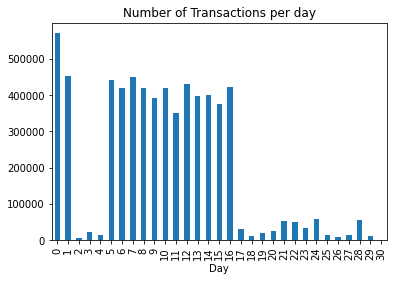

In [ ]:
F = df.groupby(['Day']).count()
F['isFraud'].plot.bar(title="Number of Transactions per day")

In [ ]:
df.shape

(6362620, 14)

In [ ]:
df.drop(['isFlaggedFraud','nameOrig','nameDest','time','step'], axis = 1, inplace=True)
df.shape

(6362620, 9)

In [ ]:
df.head(-5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Day,Hour
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0,1
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0,1
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...
6362610,TRANSFER,63416.99,63416.99,0.00,0.00,0.00,1,30,22
6362611,CASH_OUT,63416.99,63416.99,0.00,276433.18,339850.17,1,30,22
6362612,TRANSFER,1258818.82,1258818.82,0.00,0.00,0.00,1,30,23
6362613,CASH_OUT,1258818.82,1258818.82,0.00,503464.50,1762283.33,1,30,23


In [ ]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'Day', 'Hour'],
      dtype='object')

In [ ]:
df_day_count=df.groupby(['Day'])['isFraud'].sum().reset_index()
df_day_count

In [ ]:

tmp =  df[df['isFraud'] !=0]
tmp.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Day,Hour
2,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0,1
3,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0,1
251,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0,1
252,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0,1
680,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0,1


In [ ]:
tmp.to_csv("/content/drive/MyDrive/DS Project", index=False) 

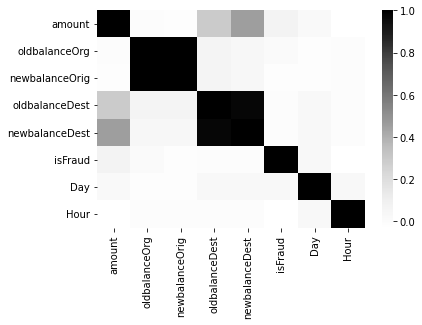

In [ ]:
tmp = df.loc[:, ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'Day', 'Hour']]


sns.heatmap(tmp.corr(), 
            cmap = 'Greys') 
plt.show()

In [ ]:
Y = df['isFraud']
print(Y.shape)

(6362620,)


In [ ]:
X = df.drop('isFraud', axis =1)
print(X.shape)

(6362620, 8)


## Check counts for each category 
### There is a huge imbalance 

In [ ]:
fraud = df[df['isFraud'] == 1]
normal = df[df['isFraud'] == 0]

In [ ]:
print(fraud.shape,normal.shape)

(8213, 9) (6354407, 9)


### We can balance it by Oversampling the 'Fraud' '1' category using SMOTE

In [ ]:
from sklearn.neighbors import NearestNeighbors
import random
from collections import Counter


In [ ]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(categorical_features = [0],random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)
Counter(Y_res)

Counter({0: 6354407, 1: 6354407})

In [ ]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Day,Hour
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,1
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,1


In [ ]:
Y = Y_res
Y.head(-100)

0           0
1           0
2           1
3           1
4           0
           ..
12708709    1
12708710    1
12708711    1
12708712    1
12708713    1
Name: isFraud, Length: 12708714, dtype: int64

In [ ]:
X = X_res
X.head(-10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Day,Hour
0,PAYMENT,9.839640e+03,1.701360e+05,160296.36,0.0,0.0,0,1
1,PAYMENT,1.864280e+03,2.124900e+04,19384.72,0.0,0.0,0,1
2,TRANSFER,1.810000e+02,1.810000e+02,0.00,0.0,0.0,0,1
3,CASH_OUT,1.810000e+02,1.810000e+02,0.00,21182.0,0.0,0,1
4,PAYMENT,1.166814e+04,4.155400e+04,29885.86,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...
12708799,TRANSFER,1.638790e+06,1.638790e+06,0.00,0.0,0.0,10,14
12708800,TRANSFER,8.519338e+06,8.519338e+06,0.00,0.0,0.0,27,5
12708801,TRANSFER,1.166109e+06,1.166109e+06,0.00,0.0,0.0,21,13
12708802,TRANSFER,4.039677e+04,4.039677e+04,0.00,0.0,0.0,7,12


In [ ]:
X.shape

(12708814, 8)

In [ ]:
#fraud.amount.describe()

In [ ]:
#normal.amount.describe()

In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
Day               0
Hour              0
dtype: int64

In [ ]:
comatrix = df.corr()
print(comatrix['isFraud'].sort_values(ascending = False))

isFraud           1.000000
amount            0.076688
Day               0.032577
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Hour             -0.031403
Name: isFraud, dtype: float64


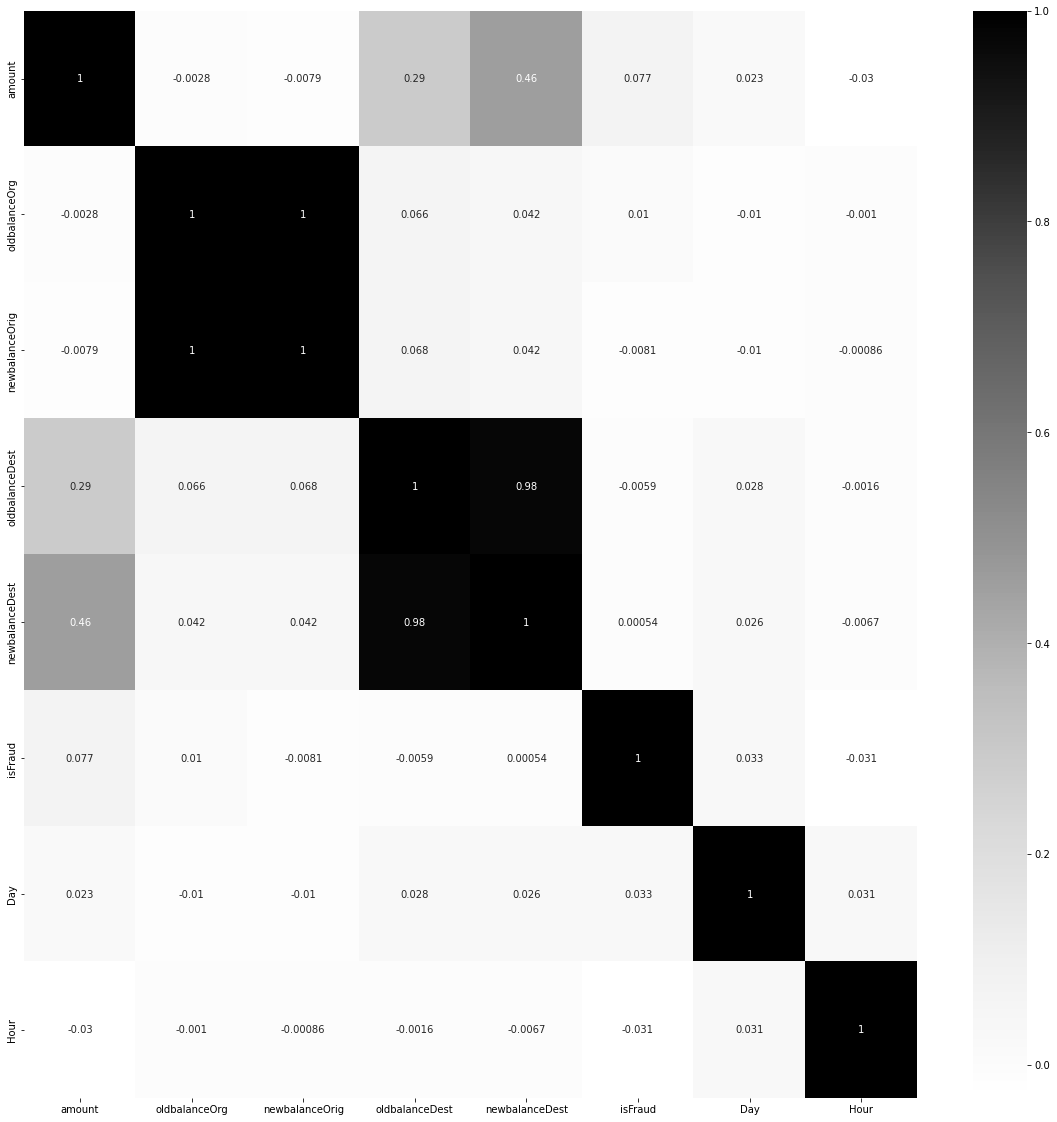

In [ ]:
top_cor = comatrix.index
plt.figure(figsize= (20,20))
hmap = sns.heatmap(df[top_cor].corr(),annot = True, cmap = "Greys")

## Transform X-train & y_train using LeaveOneOutEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 4)

In [ ]:
# Be careful...it will take 4-5 minutes to run as datasize is extremely high 6.5 M
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_train_loo.dtypes


type              float64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
Day                 int64
Hour                int64
dtype: object

In [ ]:
#Check for all variables conversion/ looks good 
X_train_loo.describe()


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Day,Hour
count,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07
mean,4.999233e-01,8.224374e+05,1.239251e+06,5.218855e+05,8.158101e+05,1.243339e+06,1.198142e+01,1.319039e+01
std,3.331906e-01,1.865308e+06,3.247091e+06,2.496515e+06,3.065422e+06,3.510813e+06,7.142805e+00,5.455601e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.706158e+04,1.060800e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+01
50%,5.877613e-01,1.720187e+05,1.187505e+05,0.000000e+00,0.000000e+00,1.229247e+05,1.200000e+01,1.400000e+01
75%,8.569107e-01,5.415340e+05,7.958228e+05,0.000000e+00,5.104664e+05,1.085943e+06,1.600000e+01,1.800000e+01
max,8.569110e-01,9.244552e+07,5.957087e+07,4.957087e+07,3.560159e+08,3.561793e+08,3.000000e+01,2.300000e+01


### Now, only "transform" X test, can't do fit.transform (Ps: Only X test, not y)

In [ ]:
# Create a new variable for X_test #Much faster as test data is only 0.2 i.e. 20%
X_test_loo = encoder.transform(X_test)
X_test_loo.describe()


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Day,Hour
count,2.541763e+06,2.541763e+06,2.541763e+06,2.541763e+06,2.541763e+06,2.541763e+06,2.541763e+06,2.541763e+06
mean,5.000150e-01,8.237908e+05,1.244725e+06,5.261049e+05,8.123685e+05,1.241240e+06,1.198390e+01,1.319015e+01
std,3.331674e-01,1.870219e+06,3.268264e+06,2.518399e+06,2.975322e+06,3.440265e+06,7.144848e+00,5.456955e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.706044e+04,1.063200e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+01
50%,5.877614e-01,1.722081e+05,1.192230e+05,0.000000e+00,0.000000e+00,1.222992e+05,1.200000e+01,1.400000e+01
75%,8.569107e-01,5.416792e+05,7.959689e+05,0.000000e+00,5.094137e+05,1.085120e+06,1.600000e+01,1.800000e+01
max,8.569107e-01,6.064200e+07,5.958504e+07,4.958504e+07,3.279630e+08,3.281945e+08,3.000000e+01,2.300000e+01


### Confirm the shape of all 4 sets

In [ ]:
print(X_train_loo.shape, X_test_loo.shape, y_train.shape, y_test.shape)

(10167051, 8) (2541763, 8) (10167051,) (2541763,)


## Convet df to array for MinMax and other computation

In [ ]:
X_train_loo = np.array(X_train_loo)
X_test_loo = np.array(X_test_loo)
y_train = np.array(y_train)
y_test = np.array(y_test)

###Import MinMaxScaler and fit_transform X_training and test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_loo = scaler.fit_transform(X_train_loo)
X_test_loo = scaler.transform(X_test_loo)

### Just check the stat summary by converting to df & creating a temp variable

In [ ]:
tmp = pd.DataFrame(X_train_loo)
tmp.describe()

,0,1,2,3,4,5,6,7
count,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07,1.016705e+07
mean,5.834017e-01,8.896455e-03,2.080298e-02,1.052807e-02,2.291499e-03,3.490766e-03,3.993806e-01,5.734952e-01
std,3.888275e-01,2.017738e-02,5.450804e-02,5.036255e-02,8.610351e-03,9.856869e-03,2.380935e-01,2.372000e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.009019e-04,1.780736e-04,0.000000e+00,0.000000e+00,0.000000e+00,2.333333e-01,4.347826e-01
50%,6.859071e-01,1.860758e-03,1.993433e-03,0.000000e+00,0.000000e+00,3.451203e-04,4.000000e-01,6.086957e-01
75%,9.999996e-01,5.857872e-03,1.335926e-02,0.000000e+00,1.433830e-03,3.048867e-03,5.333333e-01,7.826087e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Logistic Regression
### Import LR and create Predict variable

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR = LR.fit(X_train_loo,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
train_preds_LR = LR.predict(X_train_loo) 
test_preds_LR = LR.predict(X_test_loo) 

In [ ]:
w0 = LR.intercept_[0]
w0

-3.73609253549283

In [ ]:
LR.coef_

array([[   6.17152427, -195.91499355,  495.27352025, -405.88078556,
          70.44058954, -112.19810224,    2.70157469,   -3.5823488 ]])

In [ ]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Day,Hour
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,1
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,1


In [ ]:
w_type,w_amount,w_oldbalanceOrg,w_newbalanceOrig,w_oldbalanceDest,w_newbalanceDest,w_Day,w_hour = LR.coef_[0]
w_type,w_amount,w_oldbalanceOrg,w_newbalanceOrig,w_oldbalanceDest,w_newbalanceDest,w_Day,w_hour

(6.171524265005545,
 -195.91499355345994,
 495.27352024864683,
 -405.88078556184144,
 70.44058953902386,
 -112.19810224163128,
 2.7015746865073598,
 -3.5823487963992027)

### Check Confusion Matrix and Classification report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, train_preds_LR)

array([[4801778,  282527],
       [ 379433, 4703313]])

In [ ]:
confusion_matrix(y_test, test_preds_LR)

array([[1199643,   70459],
       [  94575, 1177086]])

### Check Precision and Recall rate

In [ ]:
trainReport_LR = classification_report(y_train, train_preds_LR)
print(trainReport_LR)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94   5084305
           1       0.94      0.93      0.93   5082746

    accuracy                           0.93  10167051
   macro avg       0.94      0.93      0.93  10167051
weighted avg       0.94      0.93      0.93  10167051



In [ ]:
testReport_LR = classification_report(y_test, test_preds_LR)
print(testReport_LR)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94   1270102
           1       0.94      0.93      0.93   1271661

    accuracy                           0.94   2541763
   macro avg       0.94      0.94      0.94   2541763
weighted avg       0.94      0.94      0.94   2541763



## Decision Tree Models
### Import DTR, Random Forest and GBR

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Decision Tree

In [ ]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train_loo, y_train)

In [ ]:
train_preds_DTC = DTC.predict(X_train_loo) 
test_preds_DTC = DTC.predict(X_test_loo) 

### Confusion Matrix and Class Report

### CM for Training and Test

In [ ]:
confusion_matrix(y_train, train_preds_DTC)

array([[5084305,       0],
       [      0, 5082746]])

In [ ]:
confusion_matrix(y_test, test_preds_DTC)

array([[ 721103,  548999],
       [      2, 1271659]])

In [ ]:
trainReport_DTC = classification_report(y_train, train_preds_DTC)
print(trainReport_DTC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5084305
           1       1.00      1.00      1.00   5082746

    accuracy                           1.00  10167051
   macro avg       1.00      1.00      1.00  10167051
weighted avg       1.00      1.00      1.00  10167051



In [ ]:
testReport_DTC = classification_report(y_test, test_preds_DTC)
print(testReport_DTC)

              precision    recall  f1-score   support

           0       1.00      0.57      0.72   1270102
           1       0.70      1.00      0.82   1271661

    accuracy                           0.78   2541763
   macro avg       0.85      0.78      0.77   2541763
weighted avg       0.85      0.78      0.77   2541763



## Random Forest 
### May take a long time of about 20-30 minutes

In [ ]:
RFC = RandomForestClassifier()
RFC = RFC.fit(X_train_loo, y_train)


train_preds_RFC = RFC.predict(X_train_loo) 
test_preds_RFC = RFC.predict(X_test_loo) 

### Confusion Matrix

In [ ]:
confusion_matrix(y_train, train_preds_RFC)

array([[5084305,       0],
       [      0, 5082746]])

In [ ]:
confusion_matrix(y_test, test_preds_RFC)

array([[ 815824,  454278],
       [      2, 1271659]])

### Classification Report

In [ ]:
trainReport_RFC = classification_report(y_train, train_preds_RFC)
print(trainReport_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5084305
           1       1.00      1.00      1.00   5082746

    accuracy                           1.00  10167051
   macro avg       1.00      1.00      1.00  10167051
weighted avg       1.00      1.00      1.00  10167051



In [ ]:
testReport_RFC = classification_report(y_test, test_preds_RFC)
print(testReport_RFC)

              precision    recall  f1-score   support

           0       1.00      0.64      0.78   1270102
           1       0.74      1.00      0.85   1271661

    accuracy                           0.82   2541763
   macro avg       0.87      0.82      0.82   2541763
weighted avg       0.87      0.82      0.82   2541763



## Feature importance with Random Forest
### Extract and Sort features

In [ ]:
importances = RFC.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
features_labels = df.columns[1:]


In [ ]:
for f in range(X_train_loo.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            features_labels[indices[f]], 
                            importances[indices[f]]))

 1) amount                         0.416810
 2) newbalanceOrig                 0.165345
 3) oldbalanceOrg                  0.116138
 4) Hour                           0.093286
 5) Day                            0.070710
 6) oldbalanceDest                 0.068057
 7) isFraud                        0.039153
 8) newbalanceDest                 0.030501


## Gradeint Boosting Model
### Import GBC and fit the model

In [ ]:
importances = RFC.feature_importances_
indices = np.argsort(importances)[::-1]

# Slide 50: Printing out features
for f in range(X_train_loo.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            features_labels[indices[f]], 
                            importances[indices[f]]))

In [ ]:
GBC = GradientBoostingClassifier()
GBC = GBC.fit(X_train_loo, y_train)

In [ ]:
train_preds_GBC = GBC.predict(X_train_loo) 
test_preds_GBC = GBC.predict(X_test_loo) 

### Confusion Matrix for Training & Test

In [ ]:
confusion_matrix(y_train, train_preds_GBC)

array([[5084305,       0],
       [      0, 5082746]])

In [ ]:
confusion_matrix(y_test, test_preds_GBC)

array([[ 718215,  551887],
       [      0, 1271661]])

### Classification Report

In [ ]:
trainReport_GBC = classification_report(y_train, train_preds_GBC)
print(trainReport_GBC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5084305
           1       1.00      1.00      1.00   5082746

    accuracy                           1.00  10167051
   macro avg       1.00      1.00      1.00  10167051
weighted avg       1.00      1.00      1.00  10167051



In [ ]:
testReport_GBC = classification_report(y_test, test_preds_GBC)
print(testReport_GBC)

              precision    recall  f1-score   support

           0       1.00      0.57      0.72   1270102
           1       0.70      1.00      0.82   1271661

    accuracy                           0.78   2541763
   macro avg       0.85      0.78      0.77   2541763
weighted avg       0.85      0.78      0.77   2541763



##SVC

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100.0, random_state=0)
svm.fit(X_train_loo, y_train)

## Perceptron


In [ ]:
from sklearn.linear_model import Perceptron
PPN = Perceptron(max_iter=40, eta0=0.1, random_state=0)
PPN.fit(X_train_loo, y_train)


Perceptron(eta0=0.1, max_iter=40)

In [ ]:
train_preds_PPN = PPN.predict(X_train_loo) 
test_preds_PPN = PPN.predict(X_test_loo) 

In [ ]:
confusion_matrix(y_train, train_preds_PPN)

array([[4912347,  171958],
       [ 363295, 4719451]])

In [ ]:
confusion_matrix(y_test, test_preds_PPN)

array([[1227035,   43067],
       [  90673, 1180988]])

In [ ]:
trainReport_PPN = classification_report(y_train, train_preds_PPN)
print(trainReport_PPN)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95   5084305
           1       0.96      0.93      0.95   5082746

    accuracy                           0.95  10167051
   macro avg       0.95      0.95      0.95  10167051
weighted avg       0.95      0.95      0.95  10167051



In [ ]:
testReport_PPN = classification_report(y_test, test_preds_PPN)
print(testReport_PPN)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95   1270102
           1       0.96      0.93      0.95   1271661

    accuracy                           0.95   2541763
   macro avg       0.95      0.95      0.95   2541763
weighted avg       0.95      0.95      0.95   2541763



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_loo,y_train)


KNeighborsClassifier()

In [ ]:
train_preds_KNN = KNN.predict(X_train_loo) 
test_preds_KNN = KNN.predict(X_test_loo) 

In [ ]:
confusion_matrix(y_train, train_preds_KNN)

array([[5047492,   36813],
       [   1120, 5081626]])

In [ ]:
confusion_matrix(y_test, test_preds_KNN)

array([[1257701,   12401],
       [    574, 1271087]])

In [ ]:
trainReport_KNN = classification_report(y_train, train_preds_KNN)
print(trainReport_KNN)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   5084305
           1       0.99      1.00      1.00   5082746

    accuracy                           1.00  10167051
   macro avg       1.00      1.00      1.00  10167051
weighted avg       1.00      1.00      1.00  10167051



In [ ]:
testReport_KNN = classification_report(y_test, test_preds_KNN)
print(testReport_KNN)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270102
           1       0.99      1.00      0.99   1271661

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763

